In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/ISFCR Internship/datasets/IDS Datasets/ALLFLOWMETER_HIKARI2021.csv')

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,555273,280838,C9b6Aa2csiogu3vVp9,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555274,555274,280839,CGDT4r4PAbp3mvaI6k,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555275,555275,280840,CJUxTk4Qd0kHliUKR9,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555276,555276,280841,CknUJi2R1iYJG3li3k,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1


In [6]:
df.Label.value_counts()

Label
0    517582
1     37696
Name: count, dtype: int64

In [7]:
#Sampling
# 20% sampling for minority classes and 10% each for majority classes
df_BruteForce_XML = df[df['traffic_category'] == 'Bruteforce-XML']
df_BruteForce_XML = df_BruteForce_XML.sample(frac=0.2, replace=False, random_state=None)

df_BruteForce = df[df['traffic_category'] == 'Bruteforce']
df_BruteForce = df_BruteForce.sample(frac=0.2, replace=False, random_state=None)

df_Probing = df[df['traffic_category'] == 'Probing']
df_Probing = df_Probing.sample(frac=0.2, replace=False, random_state=None)

df_XMRIGCC_CryptoMiner = df[df['traffic_category'] == 'XMRIGCC CryptoMiner']
df_XMRIGCC_CryptoMiner = df_XMRIGCC_CryptoMiner.sample(frac=0.2, replace=False, random_state=None)

df_Background = df[df['traffic_category'] == 'Background']
df_Background = df_Background.sample(frac=0.1, replace=False, random_state=None)

df_Benign = df[df['traffic_category'] == 'Benign']
df_Benign = df_Benign.sample(frac=0.1, replace=False, random_state=None)


In [8]:
# Concatenate the DataFrames
df_saved = pd.concat([df_BruteForce_XML, df_BruteForce, df_Probing, df_XMRIGCC_CryptoMiner, df_Background, df_Benign], ignore_index=True)
df_saved

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,1841,1841,COnqlE8evIu5RfNy,103.255.15.23,3610,128.199.242.104,443,15.086146,15,14,...,1.453675e+07,1.453675e+07,1.453675e+07,1.453675e+07,0.000000e+00,29200,65160,0,Bruteforce-XML,1
1,3326,3326,CMct6d4u7QdMIelhP6,103.255.15.23,8296,128.199.242.104,443,6.633495,14,13,...,6.403574e+06,6.403574e+06,6.403574e+06,6.403574e+06,0.000000e+00,29200,65160,0,Bruteforce-XML,1
2,3865,3865,Cun0nV1O2uCyfXdwi7,103.255.15.23,10568,128.199.242.104,443,13.803285,14,13,...,1.358298e+07,1.358298e+07,1.358298e+07,1.358298e+07,0.000000e+00,29200,65160,0,Bruteforce-XML,1
3,395,395,CMHFt13QAs4h0aLxKb,103.255.15.23,14368,128.199.242.104,443,14.271111,14,13,...,1.406468e+07,1.406468e+07,1.406468e+07,1.406468e+07,0.000000e+00,29200,65160,0,Bruteforce-XML,1
4,1259,1259,CxgRmH2D9SM9QvZEO7,103.255.15.23,65082,128.199.242.104,443,8.974559,14,14,...,8.746578e+06,8.746578e+06,8.746578e+06,8.746578e+06,0.000000e+00,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,505811,327910,CJRENm2pX9tSeAu0n1,103.255.15.150,37246,128.199.242.104,443,0.222759,9,12,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,402,Benign,0
59294,408874,230425,CI4HUv1jUMDLGCyQ58,103.255.15.150,60790,128.199.242.104,443,0.222877,9,12,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,402,Benign,0
59295,391763,213314,C0BoXo3BrH4WCZRkIa,103.255.15.150,39313,192.0.76.3,443,210.134591,24,17,...,6.764724e+06,1.701987e+08,2.097181e+08,3.495302e+07,6.626031e+07,29200,42340,384,Benign,0
59296,237181,56792,Cv1GM23mCrBfTvFWfd,fe80::c1a7:7791:969e:3c06,53302,2600:1901:0:38d7::,80,1.002334,2,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,28800,0,28800,Benign,0


In [9]:
# Save the sampled dataset
df_saved.to_csv('/Users/suchirmvelpanur/Desktop/ISFCR Internship/datasets/IDS Datasets/ALLFLOWMETER_HIKARI2021_sample.csv',index=0)

In [10]:
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/ISFCR Internship/datasets/IDS Datasets/ALLFLOWMETER_HIKARI2021_sample.csv')
df

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,1841,1841,COnqlE8evIu5RfNy,103.255.15.23,3610,128.199.242.104,443,15.086146,15,14,...,1.453675e+07,1.453675e+07,1.453675e+07,1.453675e+07,0.000000e+00,29200,65160,0,Bruteforce-XML,1
1,3326,3326,CMct6d4u7QdMIelhP6,103.255.15.23,8296,128.199.242.104,443,6.633495,14,13,...,6.403574e+06,6.403574e+06,6.403574e+06,6.403574e+06,0.000000e+00,29200,65160,0,Bruteforce-XML,1
2,3865,3865,Cun0nV1O2uCyfXdwi7,103.255.15.23,10568,128.199.242.104,443,13.803285,14,13,...,1.358298e+07,1.358298e+07,1.358298e+07,1.358298e+07,0.000000e+00,29200,65160,0,Bruteforce-XML,1
3,395,395,CMHFt13QAs4h0aLxKb,103.255.15.23,14368,128.199.242.104,443,14.271111,14,13,...,1.406468e+07,1.406468e+07,1.406468e+07,1.406468e+07,0.000000e+00,29200,65160,0,Bruteforce-XML,1
4,1259,1259,CxgRmH2D9SM9QvZEO7,103.255.15.23,65082,128.199.242.104,443,8.974559,14,14,...,8.746578e+06,8.746578e+06,8.746578e+06,8.746578e+06,0.000000e+00,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,505811,327910,CJRENm2pX9tSeAu0n1,103.255.15.150,37246,128.199.242.104,443,0.222759,9,12,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,402,Benign,0
59294,408874,230425,CI4HUv1jUMDLGCyQ58,103.255.15.150,60790,128.199.242.104,443,0.222877,9,12,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,402,Benign,0
59295,391763,213314,C0BoXo3BrH4WCZRkIa,103.255.15.150,39313,192.0.76.3,443,210.134591,24,17,...,6.764724e+06,1.701987e+08,2.097181e+08,3.495302e+07,6.626031e+07,29200,42340,384,Benign,0
59296,237181,56792,Cv1GM23mCrBfTvFWfd,fe80::c1a7:7791:969e:3c06,53302,2600:1901:0:38d7::,80,1.002334,2,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,28800,0,28800,Benign,0


In [11]:
# checking the shape of the dataset
shape = df.shape

print(f"The shape of the dataframe is {shape[0]} rows and {shape[1]} columns")

The shape of the dataframe is 59298 rows and 88 columns


In [12]:
# checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59298 entries, 0 to 59297
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              59298 non-null  int64  
 1   Unnamed: 0                59298 non-null  int64  
 2   uid                       59298 non-null  object 
 3   originh                   59298 non-null  object 
 4   originp                   59298 non-null  int64  
 5   responh                   59298 non-null  object 
 6   responp                   59298 non-null  int64  
 7   flow_duration             59298 non-null  float64
 8   fwd_pkts_tot              59298 non-null  int64  
 9   bwd_pkts_tot              59298 non-null  int64  
 10  fwd_data_pkts_tot         59298 non-null  int64  
 11  bwd_data_pkts_tot         59298 non-null  int64  
 12  fwd_pkts_per_sec          59298 non-null  float64
 13  bwd_pkts_per_sec          59298 non-null  float64
 14  flow_p

In [13]:
# summary statistics
df.describe()

,Unnamed: 0.1,Unnamed: 0,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,59298.000000,59298.00000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,...,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,59298.000000,59298.000000,59298.000000,59298.000000
mean,284034.247681,129417.23586,38464.865729,4766.844969,8.583630,19.693109,20.498263,9.669820,17.049293,1607.460801,...,1.199430e+05,3.397489e+06,4.773436e+06,7.564673e+06,3.936640e+06,7.406550e+05,15495.702503,23162.516004,4238.919862,0.127154
std,168855.758636,101394.61824,18187.415726,12528.148313,72.269971,148.298322,153.999620,83.932283,148.972040,4870.241846,...,1.530409e+06,1.752231e+07,2.248460e+07,7.162826e+07,1.861591e+07,7.016557e+06,14922.633273,29853.443794,10686.228730,0.333149
min,6.000000,0.00000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,136884.250000,39087.25000,28184.500000,53.000000,0.023388,1.000000,1.000000,1.000000,0.000000,4.205171,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,284647.500000,112819.00000,42590.000000,443.000000,0.028037,2.000000,2.000000,2.000000,2.000000,38.544247,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,0.000000,0.000000,0.000000
75%,432924.750000,201924.25000,53000.000000,443.000000,0.473813,10.000000,12.000000,3.000000,7.000000,79.817768,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555270.000000,350681.00000,65534.000000,65155.000000,13108.862466,21146.000000,21250.000000,2208.000000,21149.000000,167772.160000,...,1.124644e+08,2.628526e+08,2.811691e+08,1.310886e+10,2.628526e+08,1.902356e+08,65535.000000,65535.000000,65535.000000,1.000000


In [14]:
# checking for duplicate rows
duplucate_rows = df.duplicated().sum()

print(f"The number of duplicate rows are {duplucate_rows}.")

The number of duplicate rows are 0.


In [15]:
# checking for the total amount of null values
df.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
uid                     0
originh                 0
originp                 0
                       ..
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
traffic_category        0
Label                   0
Length: 88, dtype: int64

In [16]:
# Find the number of unique values in each column
unique_counts = df.nunique()

print(unique_counts)

Unnamed: 0.1            59298
Unnamed: 0              55729
uid                     59298
originh                   576
originp                 31778
                        ...  
fwd_init_window_size      137
bwd_init_window_size       93
fwd_last_window_size     1068
traffic_category            6
Label                       2
Length: 88, dtype: int64


In [17]:
value_count = df.value_counts()
value_count

Unnamed: 0.1  Unnamed: 0  uid                 originh         originp  responh          responp  flow_duration  fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  fwd_header_size_tot  fwd_header_size_min  fwd_header_size_max  bwd_header_size_tot  bwd_header_size_min  bwd_header_size_max  flow_FIN_flag_count  flow_SYN_flag_count  flow_RST_flag_count  fwd_PSH_flag_count  bwd_PSH_flag_count  flow_ACK_flag_count  fwd_URG_flag_count  bwd_URG_flag_count  flow_CWR_flag_count  flow_ECE_flag_count  fwd_pkts_payload.min  fwd_pkts_payload.max  fwd_pkts_payload.tot  fwd_pkts_payload.avg  fwd_pkts_payload.std  bwd_pkts_payload.min  bwd_pkts_payload.max  bwd_pkts_payload.tot  bwd_pkts_payload.avg  bwd_pkts_payload.std  flow_pkts_payload.min  flow_pkts_payload.max  flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  fwd_iat.min    fwd_iat.max   fwd_iat.tot   fwd_iat.avg    fwd_iat.std    bwd_iat.min 

In [18]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values:")
        print(unique_values)
        print("\n")

print_unique_values(df)

Column 'Unnamed: 0.1' has 59298 unique values:
[  1841   3326   3865 ... 391763 237181 191334]


Column 'Unnamed: 0' has 55729 unique values:
[  1841   3326   3865 ... 213314  56792  10945]


Column 'uid' has 59298 unique values:
['COnqlE8evIu5RfNy' 'CMct6d4u7QdMIelhP6' 'Cun0nV1O2uCyfXdwi7' ...
 'C0BoXo3BrH4WCZRkIa' 'Cv1GM23mCrBfTvFWfd' 'CKNOES1zQ1mSuVtBR5']


Column 'originh' has 576 unique values:
['103.255.15.23' '103.255.15.150' '103.255.15.42' '103.255.15.27'
 '103.255.15.67' '103.255.15.20' '24.212.71.31' '103.255.15.15'
 '103.255.15.65' '192.223.31.243' '103.255.15.21' '103.255.15.40'
 '103.255.15.132' '72.201.121.210' '103.255.15.237' '98.160.198.185'
 '0.0.0.0' '183.252.177.2' '103.255.15.89' '142.252.253.26' '100.64.65.26'
 '185.156.73.12' '24.212.41.209' 'fe80::c1a7:7791:969e:3c06'
 '114.55.165.157' '170.130.187.54' '103.255.15.127' '185.244.148.155'
 '103.255.15.203' '185.104.210.86' '117.248.169.145' '103.255.15.146'
 '45.155.205.106' '103.255.15.124' '89.248.165.118' '109

In [19]:
df['traffic_category'].unique()

array(['Bruteforce-XML', 'Bruteforce', 'Probing', 'XMRIGCC CryptoMiner',
       'Background', 'Benign'], dtype=object)

In [20]:
df['Label'].unique()

array([1, 0])

In [21]:
filtered_label_0 = df.loc[df['Label'] == 0, 'traffic_category']
print(filtered_label_0.unique())

['Background' 'Benign']


In [22]:
filtered_label_0 = df.loc[df['Label'] == 1, 'traffic_category']
print(filtered_label_0.unique())

['Bruteforce-XML' 'Bruteforce' 'Probing' 'XMRIGCC CryptoMiner']


In [23]:
df.Label.value_counts()

Label
0    51758
1     7540
Name: count, dtype: int64

In [24]:
'''
=> Label 0 corresponding to all normal/benign packets
=> Label 1 corresponds to malicious/unauthorized network traffic
'''

'\n=> Label 0 corresponding to all normal/benign packets\n=> Label 1 corresponds to malicious/unauthorized network traffic\n'

In [25]:
#Preprocessing Stage

In [26]:
# Drop 'uid' and 'Unnamed : 0' columns as it has no relevance to the model
df.drop(columns=['uid', 'Unnamed: 0'], inplace=True)
# Rename 'Unnamed: 0.1' column to 'id'
df.rename(columns={'Unnamed: 0.1': 'id'}, inplace=True)
df

,id,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,1841,103.255.15.23,3610,128.199.242.104,443,15.086146,15,14,6,6,...,1.453675e+07,1.453675e+07,1.453675e+07,1.453675e+07,0.000000e+00,29200,65160,0,Bruteforce-XML,1
1,3326,103.255.15.23,8296,128.199.242.104,443,6.633495,14,13,6,5,...,6.403574e+06,6.403574e+06,6.403574e+06,6.403574e+06,0.000000e+00,29200,65160,0,Bruteforce-XML,1
2,3865,103.255.15.23,10568,128.199.242.104,443,13.803285,14,13,6,5,...,1.358298e+07,1.358298e+07,1.358298e+07,1.358298e+07,0.000000e+00,29200,65160,0,Bruteforce-XML,1
3,395,103.255.15.23,14368,128.199.242.104,443,14.271111,14,13,6,5,...,1.406468e+07,1.406468e+07,1.406468e+07,1.406468e+07,0.000000e+00,29200,65160,0,Bruteforce-XML,1
4,1259,103.255.15.23,65082,128.199.242.104,443,8.974559,14,14,6,5,...,8.746578e+06,8.746578e+06,8.746578e+06,8.746578e+06,0.000000e+00,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,505811,103.255.15.150,37246,128.199.242.104,443,0.222759,9,12,3,7,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,402,Benign,0
59294,408874,103.255.15.150,60790,128.199.242.104,443,0.222877,9,12,3,7,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,402,Benign,0
59295,391763,103.255.15.150,39313,192.0.76.3,443,210.134591,24,17,11,13,...,6.764724e+06,1.701987e+08,2.097181e+08,3.495302e+07,6.626031e+07,29200,42340,384,Benign,0
59296,237181,fe80::c1a7:7791:969e:3c06,53302,2600:1901:0:38d7::,80,1.002334,2,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,28800,0,28800,Benign,0


In [27]:
df.describe()

,id,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,...,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,59298.000000,59298.000000,59298.000000,59298.000000
mean,284034.247681,38464.865729,4766.844969,8.583630,19.693109,20.498263,9.669820,17.049293,1607.460801,1562.705658,...,1.199430e+05,3.397489e+06,4.773436e+06,7.564673e+06,3.936640e+06,7.406550e+05,15495.702503,23162.516004,4238.919862,0.127154
std,168855.758636,18187.415726,12528.148313,72.269971,148.298322,153.999620,83.932283,148.972040,4870.241846,4397.478160,...,1.530409e+06,1.752231e+07,2.248460e+07,7.162826e+07,1.861591e+07,7.016557e+06,14922.633273,29853.443794,10686.228730,0.333149
min,6.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,136884.250000,28184.500000,53.000000,0.023388,1.000000,1.000000,1.000000,0.000000,4.205171,3.066929,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,284647.500000,42590.000000,443.000000,0.028037,2.000000,2.000000,2.000000,2.000000,38.544247,43.148242,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,0.000000,0.000000,0.000000
75%,432924.750000,53000.000000,443.000000,0.473813,10.000000,12.000000,3.000000,7.000000,79.817768,79.673919,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555270.000000,65534.000000,65155.000000,13108.862466,21146.000000,21250.000000,2208.000000,21149.000000,167772.160000,88768.338624,...,1.124644e+08,2.628526e+08,2.811691e+08,1.310886e+10,2.628526e+08,1.902356e+08,65535.000000,65535.000000,65535.000000,1.000000


In [28]:
# Statistical methods
summary_stats = df.describe()
print(summary_stats)

                  id       originp       responp  flow_duration  fwd_pkts_tot  \
count   59298.000000  59298.000000  59298.000000   59298.000000  59298.000000   
mean   284034.247681  38464.865729   4766.844969       8.583630     19.693109   
std    168855.758636  18187.415726  12528.148313      72.269971    148.298322   
min         6.000000     21.000000      0.000000       0.000000      0.000000   
25%    136884.250000  28184.500000     53.000000       0.023388      1.000000   
50%    284647.500000  42590.000000    443.000000       0.028037      2.000000   
75%    432924.750000  53000.000000    443.000000       0.473813     10.000000   
max    555270.000000  65534.000000  65155.000000   13108.862466  21146.000000   

       bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
count  59298.000000       59298.000000       59298.000000      59298.000000   
mean      20.498263           9.669820          17.049293       1607.460801   
std      153.999620          83.9

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59298 entries, 0 to 59297
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        59298 non-null  int64  
 1   originh                   59298 non-null  object 
 2   originp                   59298 non-null  int64  
 3   responh                   59298 non-null  object 
 4   responp                   59298 non-null  int64  
 5   flow_duration             59298 non-null  float64
 6   fwd_pkts_tot              59298 non-null  int64  
 7   bwd_pkts_tot              59298 non-null  int64  
 8   fwd_data_pkts_tot         59298 non-null  int64  
 9   bwd_data_pkts_tot         59298 non-null  int64  
 10  fwd_pkts_per_sec          59298 non-null  float64
 11  bwd_pkts_per_sec          59298 non-null  float64
 12  flow_pkts_per_sec         59298 non-null  float64
 13  down_up_ratio             59298 non-null  float64
 14  fwd_he

In [30]:
from sklearn.preprocessing import LabelEncoder

# Fit LabelEncoder on the entire 'originh' and 'responh' columns
le_originh = LabelEncoder()
le_responh = LabelEncoder()
df['originh'] = le_originh.fit_transform(df['originh'])
df['responh'] = le_responh.fit_transform(df['responh'])


In [31]:
# Apply One-Hot Encoding for 'traffic_category'
df = pd.get_dummies(df, columns=['traffic_category'])


In [32]:
df = df.astype(int)

In [33]:
df

,id,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label,traffic_category_Background,traffic_category_Benign,traffic_category_Bruteforce,traffic_category_Bruteforce-XML,traffic_category_Probing,traffic_category_XMRIGCC CryptoMiner
0,1841,43,3610,424,443,15,15,14,6,6,...,29200,65160,0,1,0,0,0,1,0,0
1,3326,43,8296,424,443,6,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
2,3865,43,10568,424,443,13,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
3,395,43,14368,424,443,14,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
4,1259,43,65082,424,443,8,14,14,6,5,...,29200,65160,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,505811,37,37246,424,443,0,9,12,3,7,...,29200,65160,402,0,0,1,0,0,0,0
59294,408874,37,60790,424,443,0,9,12,3,7,...,29200,65160,402,0,0,1,0,0,0,0
59295,391763,37,39313,1210,443,210,24,17,11,13,...,29200,42340,384,0,0,1,0,0,0,0
59296,237181,575,53302,1527,80,1,2,0,0,0,...,28800,0,28800,0,0,1,0,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59298 entries, 0 to 59297
Data columns (total 91 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   id                                    59298 non-null  int64
 1   originh                               59298 non-null  int64
 2   originp                               59298 non-null  int64
 3   responh                               59298 non-null  int64
 4   responp                               59298 non-null  int64
 5   flow_duration                         59298 non-null  int64
 6   fwd_pkts_tot                          59298 non-null  int64
 7   bwd_pkts_tot                          59298 non-null  int64
 8   fwd_data_pkts_tot                     59298 non-null  int64
 9   bwd_data_pkts_tot                     59298 non-null  int64
 10  fwd_pkts_per_sec                      59298 non-null  int64
 11  bwd_pkts_per_sec                      592

In [85]:
df.Label.value_counts()

Label
0    51758
1     7540
Name: count, dtype: int64

In [35]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [36]:
X_train.shape

(47438, 90)

In [37]:
pd.Series(y_train).value_counts()

0    46913
1      525
Name: count, dtype: int64

In [38]:
#Oversampling by SMOTE

In [39]:
from imblearn.over_sampling import SMOTE
# Calculate the desired number of samples for class 1 (minority class)
desired_samples_class_1 = df['Label'].value_counts()[0]
desired_samples_class_1

51758

In [40]:
# Initialize SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy={1: desired_samples_class_1}, n_jobs=-1)

In [41]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [42]:
pd.Series(y_train).value_counts()

1    51758
0    46913
Name: count, dtype: int64

Accuracy of DT: 1.0
Precision of DT: 1.0
Recall of DT: 1.0
F1-score of DT: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



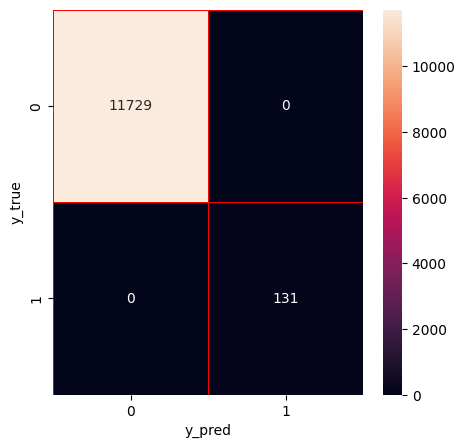

In [43]:
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [44]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 1.0
Precision of RF: 1.0
Recall of RF: 1.0
F1-score of RF: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



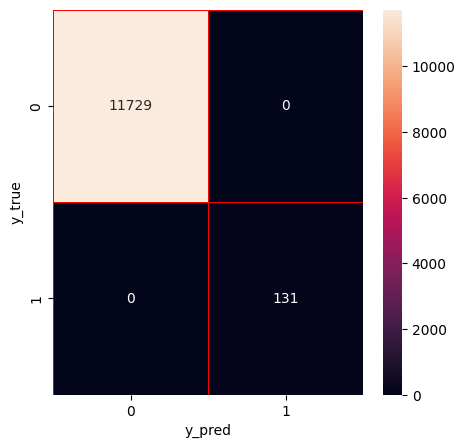

In [45]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [46]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 1.0
Precision of ET: 1.0
Recall of ET: 1.0
F1-score of ET: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



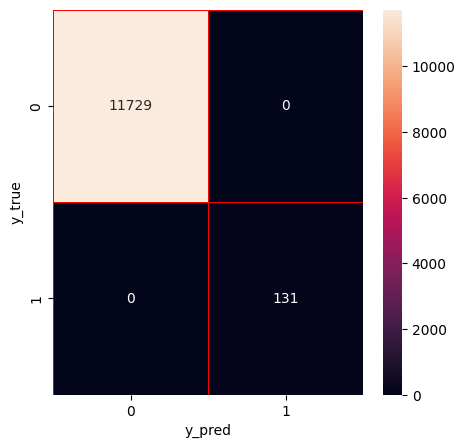

In [47]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [48]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 1.0
Precision of XGBoost: 1.0
Recall of XGBoost: 1.0
F1-score of XGBoost: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



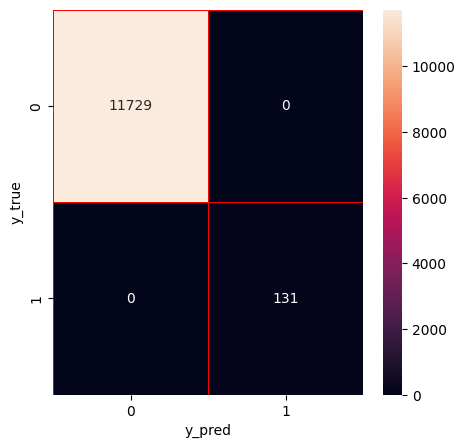

In [49]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [50]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [51]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
98666,1,1,1,1
98667,1,1,1,1
98668,1,1,1,1
98669,1,1,1,1


In [52]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [53]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [54]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

Accuracy of Stacking: 1.0
Precision of Stacking: 1.0
Recall of Stacking: 1.0
F1-score of Stacking: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



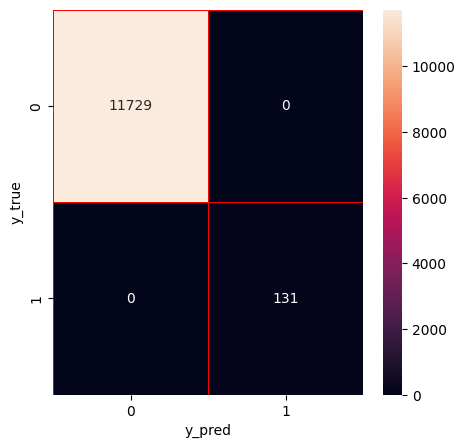

In [55]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [56]:
#Feature Selection Process

In [57]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [58]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [59]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.5997, 'traffic_category_XMRIGCC CryptoMiner'), (0.0405, 'originp'), (0.0349, 'id'), (0.0297, 'flow_iat.min'), (0.0228, 'fwd_pkts_payload.min'), (0.0225, 'originh'), (0.02, 'traffic_category_Benign'), (0.0174, 'active.min'), (0.0173, 'bwd_header_size_max'), (0.0166, 'bwd_header_size_min'), (0.0144, 'fwd_iat.min'), (0.014, 'flow_pkts_payload.min'), (0.0126, 'responh'), (0.0125, 'active.tot'), (0.0113, 'fwd_header_size_min'), (0.0105, 'traffic_category_Background'), (0.0071, 'fwd_header_size_max'), (0.0068, 'bwd_init_window_size'), (0.0061, 'fwd_iat.avg'), (0.0053, 'flow_pkts_per_sec'), (0.0052, 'down_up_ratio'), (0.0043, 'bwd_pkts_per_sec'), (0.0039, 'bwd_pkts_tot'), (0.0038, 'fwd_init_window_size'), (0.0035, 'bwd_pkts_payload.min'), (0.0035, 'active.max'), (0.0033, 'fwd_iat.tot'), (0.0029, 'bwd_subflow_pkts'), (0.0028, 'fwd_subflow_pkts'), (0.0028, 'active.avg'), (0.0026, 'flow_pkts_payload.max'), (0.0026, 'flow_iat.tot'), (0.0023, 'flow_iat.avg'), (0

In [60]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)

In [61]:
len(f_list)

90

In [62]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum >= 0.9:
        break    

In [63]:
X_fs = df[fs].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [65]:
X_train.shape

(47438, 17)

In [66]:
pd.Series(y_train).value_counts()

0    46913
1      525
Name: count, dtype: int64

In [67]:
#Oversampling by SMOTE

In [68]:
from imblearn.over_sampling import SMOTE
# Calculate the desired number of samples for class 1 (minority class)
desired_samples_class_1 = df['Label'].value_counts()[0]
desired_samples_class_1
# Initialize SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy={1: desired_samples_class_1}, n_jobs=-1)

In [69]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [70]:
pd.Series(y_train).value_counts()

1    51758
0    46913
Name: count, dtype: int64

In [71]:
#Modelling after feature selection:

Accuracy of DT: 1.0
Precision of DT: 1.0
Recall of DT: 1.0
F1-score of DT: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



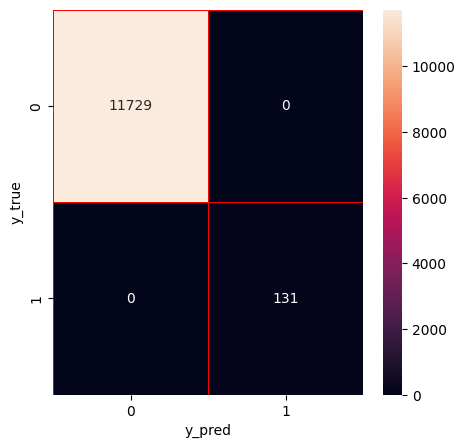

In [72]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [73]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 1.0
Precision of RF: 1.0
Recall of RF: 1.0
F1-score of RF: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



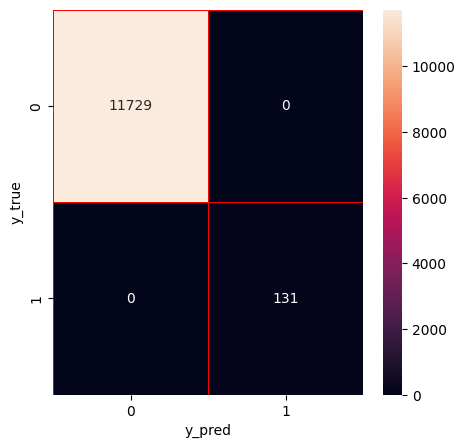

In [74]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [75]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 1.0
Precision of ET: 1.0
Recall of ET: 1.0
F1-score of ET: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



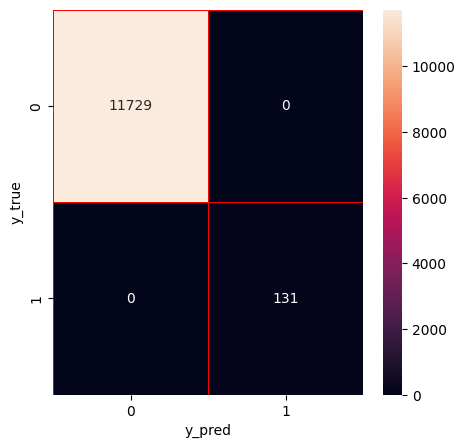

In [76]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [77]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 1.0
Precision of XGBoost: 1.0
Recall of XGBoost: 1.0
F1-score of XGBoost: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



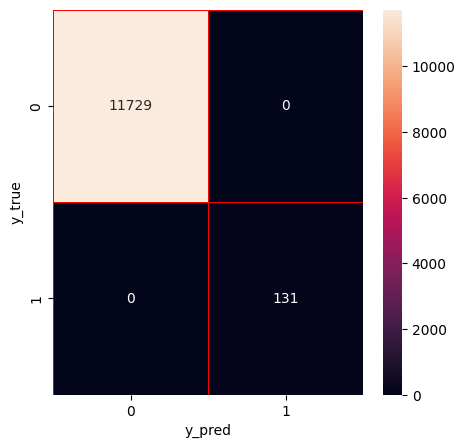

In [78]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [79]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [80]:
#Stacking Model Construction

In [81]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [82]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [83]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 1.0
Precision of Stacking: 1.0
Recall of Stacking: 1.0
F1-score of Stacking: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



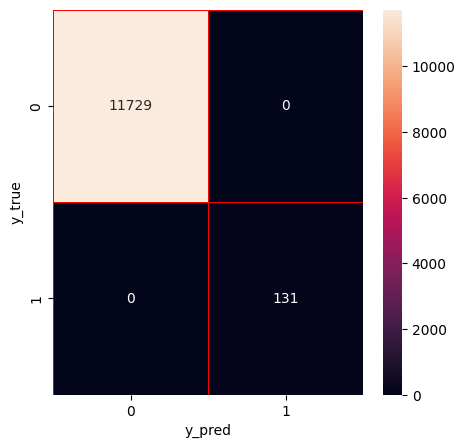

In [84]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
corr_matrix = df.